<a href="https://colab.research.google.com/github/PiHau/2024_Remote_Sensing/blob/main/TP/TP2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install matplotlib rasterio numpy scikit-image basemap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 54.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 936.0/936.0 kB 34.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 19.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 3.3 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.1
    Uninstalling packaging-24.1:
      Successfully uninstalled packaging-24.1


In [3]:
import matplotlib.pyplot as plt
import rasterio
from rasterio.plot import show
from matplotlib.colors import Normalize
from rasterio.warp import calculate_default_transform, reproject, Resampling
import numpy as np

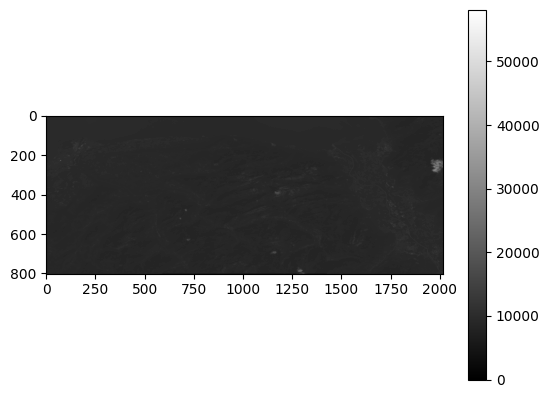

In [5]:
# Section 1.1
# L'image que nous avons ici est une image Landsat 8 avec 11 bandes, au format geotiff.
# La zone d'intérêt est la rive sud du lac Léman.
# Pour la première bande, nous avons un tiff géoréférencé. Ouvrons-le et regardons-le :

B1 = rasterio.open('/content/20150821.B1.geotagged.tif')
B1_array = B1.read(1)
plt.figure(1)
plt.clf()
plt.imshow(B1_array, cmap='gray', norm=Normalize(vmin=np.min(B1_array), vmax=np.max(B1_array)))
plt.colorbar()
plt.show()

# Notez qu'en lisant le fichier geotiff, nous avons deux arguments de sortie :
# B1 (l'image) et les informations de géoréférencement de l'image.

In [6]:
# Section 1.2
# Regardons les informations de géoréférencement
R = B1.transform
print(R)

| 0.00, 0.00, 6.47|
| 0.00,-0.00, 46.43|
| 0.00, 0.00, 1.00|


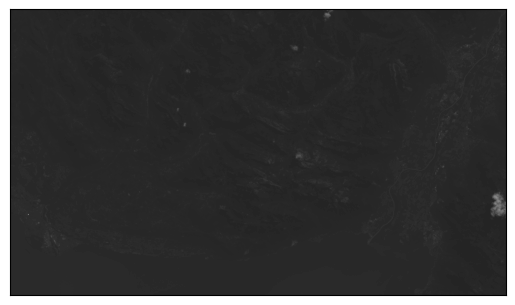

In [7]:
# Section 1.3
# Utilisation de ces informations pour visualiser l'image avec un système de coordonnées
from mpl_toolkits.basemap import Basemap

plt.figure(1)
plt.clf()
m = Basemap(projection='merc', llcrnrlat=B1.bounds.bottom, urcrnrlat=B1.bounds.top,
            llcrnrlon=B1.bounds.left, urcrnrlon=B1.bounds.right, resolution='i')
m.imshow(B1_array, cmap='gray', norm=Normalize(vmin=np.min(B1_array), vmax=np.max(B1_array)))
plt.show()


In [10]:
# Section 1.4
# Charger l'image en utilisant les informations de fichier world (.tfw)
B1 = rasterio.open('/content/20150821.B1.tif')
R = rasterio.open('/content/20150821.B1.tfw').transform
plt.figure(1)
plt.clf()
m = Basemap(projection='merc', llcrnrlat=B1.bounds.bottom, urcrnrlat=B1.bounds.top,
            llcrnrlon=B1.bounds.left, urcrnrlon=B1.bounds.right, resolution='i')
m.imshow(B1_array, cmap='gray', norm=Normalize(vmin=np.min(B1_array), vmax=np.max(B1_array)))
plt.show()

RasterioIOError: '/content/20150821.B1.tfw' not recognized as being in a supported file format.

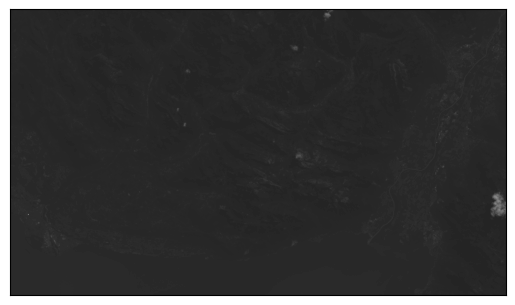

In [11]:
# Section 1.4
# Charger l'image en utilisant les informations de fichier world (.tfw)
B1 = rasterio.open('/content/20150821.B1.tif')
# Use rasterio.Affine to read the world file
with open('/content/20150821.B1.tfw') as f:
    R = rasterio.Affine.from_gdal(*[float(x) for x in f.read().split()])
plt.figure(1)
plt.clf()
m = Basemap(projection='merc', llcrnrlat=B1.bounds.bottom, urcrnrlat=B1.bounds.top,
            llcrnrlon=B1.bounds.left, urcrnrlon=B1.bounds.right, resolution='i')
m.imshow(B1_array, cmap='gray', norm=Normalize(vmin=np.min(B1_array), vmax=np.max(B1_array)))
plt.show()

In [13]:
# Section 2
# Charger les 11 bandes de notre image Landsat-8

B1 = rasterio.open('20150821.B1.tif').read(1)
B2 = rasterio.open('20150821.B2.tif').read(1)
B3 = rasterio.open('20150821.B3.tif').read(1)
B4 = rasterio.open('20150821.B4.tif').read(1)
B5 = rasterio.open('20150821.B5.tif').read(1)
B6 = rasterio.open('20150821.B6.tif').read(1)
B7 = rasterio.open('20150821.B7.tif').read(1)
B8 = rasterio.open('20150821.B8.tif').read(1)
B9 = rasterio.open('20150821.B9.tif').read(1)
B10 = rasterio.open('20150821.B10.tif').read(1)
B11 = rasterio.open('20150821.B11.tif').read(1)

In [14]:
# Section 2.1
# Composition couleur RGB avec B4=>blue, B3=>green, B2=>red
from skimage import exposure

Blue_adj = exposure.rescale_intensity(B2, in_range='image')
Green_adj = exposure.rescale_intensity(B3, in_range='image')
Red_adj = exposure.rescale_intensity(B4, in_range='image')

RGB = np.dstack((Red_adj, Green_adj, Blue_adj))

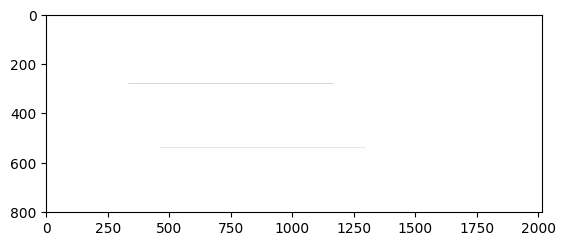

In [17]:
# Section 2.2
# Affichage de l'image RGB
plt.figure(1)
plt.clf()
plt.imshow(RGB)
plt.show()

ValueError: Vous devez cliquer sur l'image pour spécifier lat et lon.

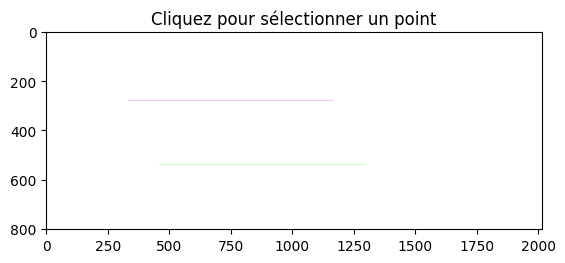

In [27]:
# Section 3.1
# Affichage des valeurs des bandes à des localisations spécifiques
n = 1  # nombre de points à tester
for i in range(n):
    plt.figure(1)
    plt.imshow(RGB)
    plt.title('Cliquez pour sélectionner un point')
    coord = plt.ginput(1)

    if not coord:
        raise ValueError('Vous devez cliquer sur l\'image pour spécifier lat et lon.')

    lon, lat = coord[0]
    bandsval = [
        B1[int(lat), int(lon)],
        B2[int(lat), int(lon)],
        B3[int(lat), int(lon)],
        B4[int(lat), int(lon)],
        B5[int(lat), int(lon)],
        B6[int(lat), int(lon)],
        B7[int(lat), int(lon)],
        np.nan,  # Ignorer la bande 8
        np.nan,  # Ignorer la bande 9
        B10[int(lat), int(lon)],
        B11[int(lat), int(lon)]
    ]

    plt.figure(2)
    plt.plot(bandsval, '.-')
    plt.xlabel('Bande')
    plt.ylabel('DNs')
    plt.show()


Vous devez cliquer sur l'image pour spécifier lat et lon.


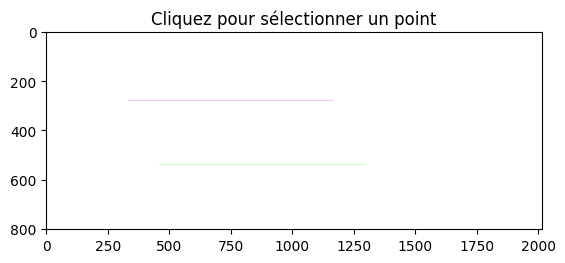

In [18]:
# Section 3.1
# Affichage des valeurs des bandes à des localisations spécifiques
n = 1  # nombre de points à tester
for i in range(n):
    plt.figure(1)
    plt.imshow(RGB)
    plt.title('Cliquez pour sélectionner un point')
    coord = plt.ginput(1)

    if not coord:
        print('Vous devez cliquer sur l\'image pour spécifier lat et lon.') # Changed to a print statement to avoid stopping execution.
        continue #Added continue to skip to the next iteration if no coordinate is selected


    lon, lat = coord[0]
    bandsval = [
        B1[int(lat), int(lon)],
        B2[int(lat), int(lon)],
        B3[int(lat), int(lon)],
        B4[int(lat), int(lon)],
        B5[int(lat), int(lon)],
        B6[int(lat), int(lon)],
        B7[int(lat), int(lon)],
        np.nan,  # Ignorer la bande 8
        np.nan,  # Ignorer la bande 9
        B10[int(lat), int(lon)],
        B11[int(lat), int(lon)]
    ]

    plt.figure(2)
    plt.plot(bandsval, '.-')
    plt.xlabel('Bande')
    plt.ylabel('DNs')
    plt.show()

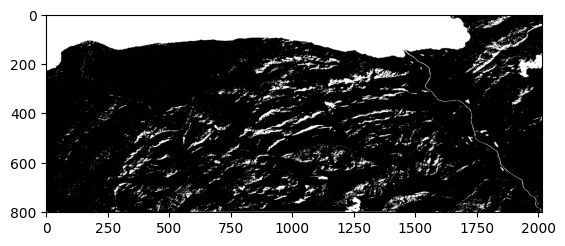

In [19]:
# Section 3.2
# Identification de l'eau avec le critère des faibles valeurs en infrarouge proche (bande 5)
Water = B5 < 1e4
plt.figure(3)
plt.clf()
plt.imshow(Water, cmap='gray')
plt.show()

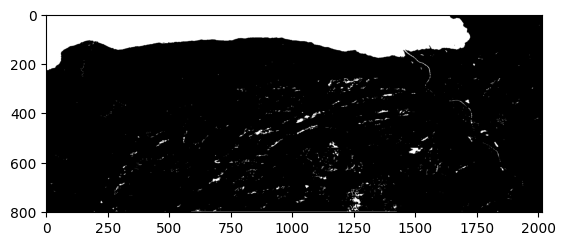

In [20]:
# Section 3.3
# Identification de l'eau basée sur la comparaison entre la bande 5 et la bande 4
Water = B5 < B4
plt.figure(3)
plt.clf()
plt.imshow(Water, cmap='gray')
plt.show()

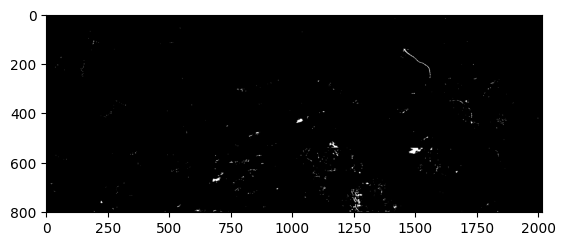

In [21]:
# Section 3.4
# Identification des rivières basées sur les pixels d'eau et la bande 1 (bleu côtier)
Shallow = (Water == 1) & (B1 > 1e4)
plt.figure(3)
plt.clf()
plt.imshow(Shallow, cmap='gray')
plt.show()


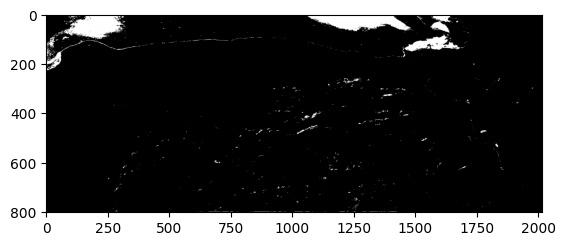

In [22]:
# Section 3.5
# Identification des zones sédimentées dans le lac basées sur la bande 3 (vert)
Sediment = (Water == 1) & (Shallow == 0) & (B3 > 0.75e4)
plt.figure(3)
plt.clf()
plt.imshow(Sediment, cmap='gray')
plt.show()

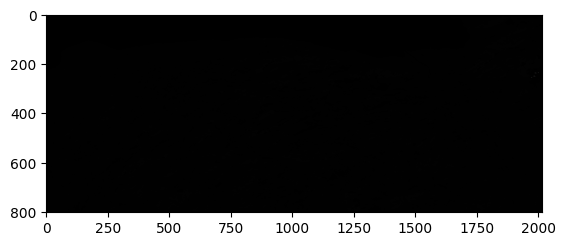

In [23]:
# Section 3.6 NDWI (Normalized Difference Water Index)
NDWI = (B3 - B5) / (B3 + B5)
plt.figure(4)
plt.clf()
plt.imshow(NDWI, cmap='gray')
plt.show()

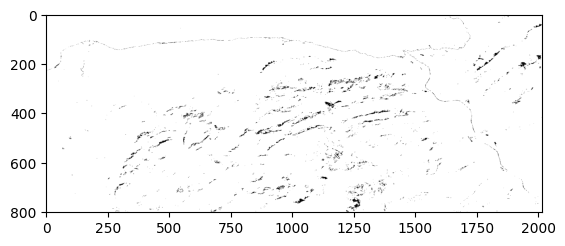

In [24]:
NDWI_water = NDWI > 0.1
plt.figure(5)
plt.clf()
plt.imshow(NDWI_water, cmap='gray')
plt.show()


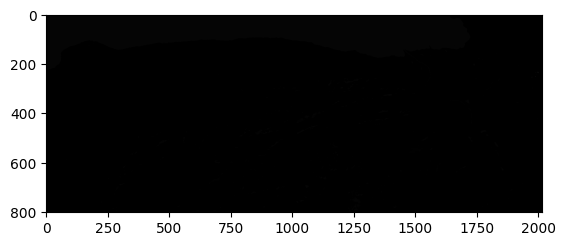

In [25]:
# Section 3.7 NDVI (Normalized Difference Vegetation Index)
NDVI = (B5 - B4) / (B5 + B4)
plt.figure(6)
plt.clf()
plt.imshow(NDVI, cmap='gray')
plt.show()


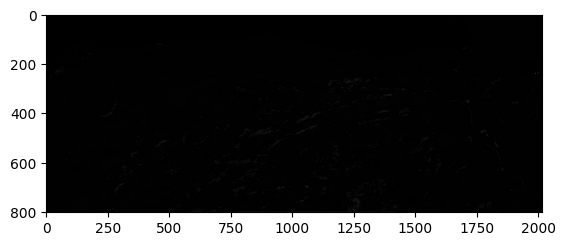

In [26]:
# Section 3.7 NDSI (Normalized Difference Snow Index)
NDSI = (B5 - B7) / (B5 + B7)
plt.figure(7)
plt.clf()
plt.imshow(NDSI, cmap='gray')
plt.show()